In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns


In [19]:
df = pd.read_csv('C:\\Users\\singl\\OneDrive\\Documents\\MATLAB\\frontend\\G_TRAIN.csv')

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7523 entries, 0 to 7522
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -0.55307     7523 non-null   float64
 1   -13.949      7523 non-null   float64
 2   7.2276       7523 non-null   float64
 3   0.81332      7523 non-null   float64
 4   0.81042      7523 non-null   float64
 5   0.57891      7523 non-null   float64
 6   0.057156     7523 non-null   float64
 7   0.30691      7523 non-null   float64
 8   -0.28209     7523 non-null   float64
 9   0.34901      7523 non-null   float64
 10  -0.17654     7523 non-null   float64
 11  0.04809      7523 non-null   float64
 12  -0.13412     7523 non-null   float64
 13  0.061958     7523 non-null   float64
 14  -0.0051918   7523 non-null   float64
 15  -0.059493    7523 non-null   float64
 16  0.021623     7523 non-null   float64
 17  0.0066646    7523 non-null   float64
 18  0.0037259    7523 non-null   float64
 19  0.0046

In [21]:
X = df.iloc[:, 0:42].values
y = df.iloc[:,-1].values

In [22]:
y=y.astype(int)

In [23]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_scaled, y)

C:\Users\singl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
train_acc = model.score(X_scaled, y)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 90.96105277150073


In [27]:
df = pd.read_csv('C:\\Users\\singl \
                 \\OneDrive\\Documents\\MATLAB\\frontend\\G_TEST.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628 entries, 0 to 5627
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -0.61543     5628 non-null   float64
 1   -14.131      5628 non-null   float64
 2   7.2227       5628 non-null   float64
 3   0.86465      5628 non-null   float64
 4   0.82526      5628 non-null   float64
 5   0.68033      5628 non-null   float64
 6   -0.0077126   5628 non-null   float64
 7   0.16853      5628 non-null   float64
 8   -0.24033     5628 non-null   float64
 9   0.44992      5628 non-null   float64
 10  -0.15454     5628 non-null   float64
 11  0.032867     5628 non-null   float64
 12  -0.10616     5628 non-null   float64
 13  0.085554     5628 non-null   float64
 14  -0.0052878   5628 non-null   float64
 15  -0.059417    5628 non-null   float64
 16  0.022089     5628 non-null   float64
 17  0.0076177    5628 non-null   float64
 18  0.0041761    5628 non-null   float64
 19  0.0044

In [29]:
# import matplotlib.colors as mcolors
# colors = list(mcolors.CSS4_COLORS.keys())[3:]
# def draw_histograms(dataframe, features, rows, cols):
#     fig=plt.figure(figsize=(20,20))
#     for i, feature in enumerate(features):
#         ax=fig.add_subplot(rows,cols,i+1)
#         dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
#         ax.set_title(feature+" Histogram",color=colors[35])
#         ax.set_yscale('log')
#     fig.tight_layout() 
#     plt.savefig('Histograms.png')
#     plt.show()
# draw_histograms(df,df.columns,8,4)

In [30]:
x_test = df.iloc[:, 0:42].values
y_test = df.iloc[:,-1].values

In [31]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_scaled_test = scaler.transform(x_test)

In [32]:
y_pred=model.predict(x_scaled_test)
y_pred

array([1, 2, 2, ..., 0, 0, 0])

In [33]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(y_test, y_pred))

The Accuracy for Test Set is 71.64179104477611
              precision    recall  f1-score   support

           0       0.45      0.49      0.47       677
           1       0.72      0.81      0.76      2474
           2       0.81      0.69      0.74      2477

    accuracy                           0.72      5628
   macro avg       0.66      0.66      0.66      5628
weighted avg       0.73      0.72      0.72      5628



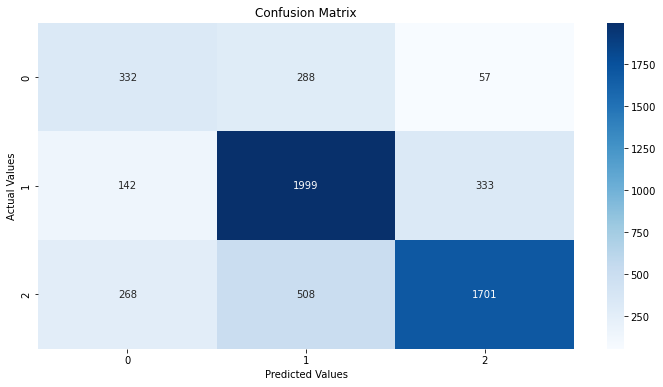

In [34]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test,y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print(eer_threshold)
print("EER = ", EER)

2
EER =  0.8654001616814875
